In [ ]:
import os 
import pathlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"sauravprasad","key":"6c840775b90feb6e24e273f82d792970"}'}

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

100% 572M/572M [00:05<00:00, 119MB/s]



In [ ]:
!unzip \*.zip

Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.


In [ ]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")
    
    return img

['person632_virus_1211.jpeg']
image shape (1072, 1624)


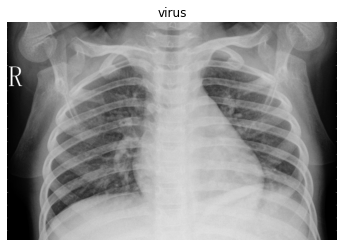

In [ ]:
img = view_image("/content/COVID_IEEE/","virus")

['IM-0522-0001.jpeg']
image shape (1074, 1636)


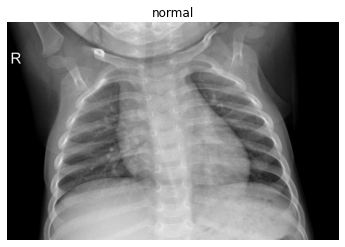

In [ ]:
img = view_image("/content/COVID_IEEE/","normal")

['covid1900106.png']
image shape (480, 640, 3)


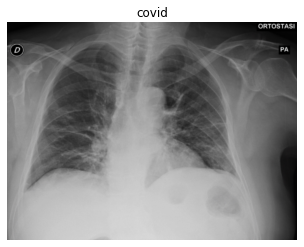

In [ ]:
img = view_image("/content/COVID_IEEE/","covid")

In [ ]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [ ]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [ ]:
virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))
    

    data.append(image)
    labels.append(2)

In [ ]:
data = np.array(data) / 255.0
img_labels = np.array(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
activation_2 (Activation)    (None, 112, 112, 64)      0

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 41s 242ms/step - loss: 0.9109 - accuracy: 0.5892 - val_loss: 0.5276 - val_accuracy: 0.8288
Epoch 2/15
32/32 [==============================] - 4s 127ms/step - loss: 0.5027 - accuracy: 0.8147 - val_loss: 0.3059 - val_accuracy: 0.8973
Epoch 3/15
32/32 [==============================] - 4s 127ms/step - loss: 0.3658 - accuracy: 0.8676 - val_loss: 0.2935 - val_accuracy: 0.8995
Epoch 4/15
32/32 [==============================] - 4s 127ms/step - loss: 0.2944 - accuracy: 0.8951 - val_loss: 0.2559 - val_accuracy: 0.9224
Epoch 5/15
32/32 [==============================] - 4s 128ms/step - loss: 0.2184 - accuracy: 0.9255 - val_loss: 0.2335 - val_accuracy: 0.9155
Epoch 6/15
32/32 [==============================] - 4s 128ms/step - loss: 0.1816 - accuracy: 0.9373 - val_loss: 0.2056 - val_accuracy: 0.9201
Epoch 7/15
32/32 [==============================] - 4s 129ms/step - loss: 0.1279 - accuracy: 0.9539 - val_loss: 0.2141 - val_accuracy: 0.9292
Epoch

Text(0.5, 1.0, 'Training-Validation Accuracy')

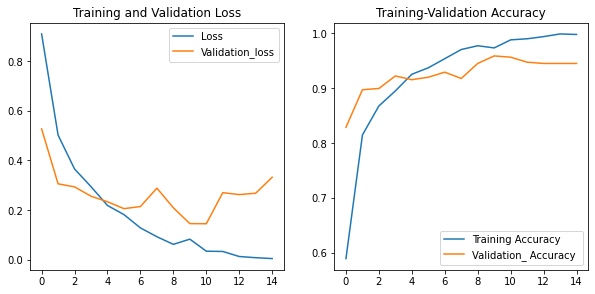

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [ ]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.90      0.98      0.94       129
           2       0.96      0.90      0.93       128

    accuracy                           0.94       365
   macro avg       0.95      0.94      0.94       365
weighted avg       0.94      0.94      0.94       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,102,3,3
normal,0,127,2
virus,2,11,115


In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model = Flatten()(base_model.output)

model = Dense(units=1024, activation="relu")(model)
model = Dense(units=512, activation="relu")(model)
model = Dense(units=256, activation="relu")(model)

prediction_layer = Dense(units=3, activation="softmax")(model)

In [ ]:
model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 5s 105ms/step - loss: 9.9245 - accuracy: 0.7588 - val_loss: 0.4313 - val_accuracy: 0.9635
Epoch 2/15
32/32 [==============================] - 2s 64ms/step - loss: 0.5213 - accuracy: 0.9431 - val_loss: 1.2139 - val_accuracy: 0.8927
Epoch 3/15
32/32 [==============================] - 2s 65ms/step - loss: 0.4612 - accuracy: 0.9500 - val_loss: 0.7402 - val_accuracy: 0.9589
Epoch 4/15
32/32 [==============================] - 2s 68ms/step - loss: 0.2141 - accuracy: 0.9784 - val_loss: 0.3158 - val_accuracy: 0.9749
Epoch 5/15
32/32 [==============================] - 2s 63ms/step - loss: 0.1093 - accuracy: 0.9892 - val_loss: 0.4281 - val_accuracy: 0.9772
Epoch 6/15
32/32 [==============================] - 2s 64ms/step - loss: 0.0409 - accuracy: 0.9990 - val_loss: 0.2468 - val_accuracy: 0.9749
Epoch 7/15
32/32 [==============================] - 2s 64ms/step - loss: 0.0464 - accuracy: 0.9971 - val_loss: 0.2255 - val_accuracy: 0.9749
Epoch 8/15
3

Text(0.5, 1.0, 'Training-Validation Accuracy')

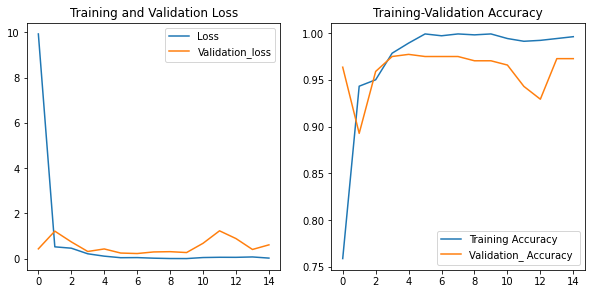

In [ ]:
#saving the model history
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

In [ ]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       108
           1       0.91      0.98      0.95       129
           2       0.97      0.93      0.95       128

    accuracy                           0.96       365
   macro avg       0.96      0.96      0.96       365
weighted avg       0.96      0.96      0.96       365



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,103,3,2
normal,0,127,2
virus,0,9,119
